In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/weather-automated-sensors-dataset.csv')


In [4]:
print("Shape of Dataset:", data.shape)


Shape of Dataset: (59144, 18)


In [5]:
print("First 5 rows:", data.head)

First 5 rows: <bound method NDFrame.head of                       Station Name   Measurement Timestamp  Air Temperature  \
0       Oak Street Weather Station  05/22/2015 03:00:00 PM              NaN   
1       Oak Street Weather Station  05/22/2015 05:00:00 PM              NaN   
2       Oak Street Weather Station  05/22/2015 06:00:00 PM              NaN   
3       Oak Street Weather Station  05/22/2015 07:00:00 PM              NaN   
4       Oak Street Weather Station  05/22/2015 08:00:00 PM              NaN   
...                            ...                     ...              ...   
59139   Oak Street Weather Station  11/08/2017 12:00:00 AM             4.70   
59140       Foster Weather Station  11/08/2017 12:00:00 AM             2.89   
59141  63rd Street Weather Station  11/08/2017 01:00:00 AM             3.40   
59142   Oak Street Weather Station  11/08/2017 01:00:00 AM             4.20   
59143       Foster Weather Station  11/08/2017 01:00:00 AM             2.28   

       

In [6]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 13  S

In [7]:
print("\nDataset Description:\n", data.describe())



Dataset Description:
        Air Temperature  Wet Bulb Temperature      Humidity  Rain Intensity  \
count     59066.000000          38843.000000  59141.000000    38843.000000   
mean         13.282062             10.643001     69.464517        0.187591   
std           9.945331              8.965170     15.714691        1.962149   
min         -19.890000            -20.100000     17.000000        0.000000   
25%           5.500000              4.000000     59.000000        0.000000   
50%          14.900000             12.100000     71.000000        0.000000   
75%          21.500000             18.100000     82.000000        0.000000   
max          34.100000             28.400000    100.000000      183.600000   

       Interval Rain    Total Rain  Precipitation Type  Wind Direction  \
count   59141.000000  38843.000000        38843.000000    59141.000000   
mean        0.175327    185.445529            4.651932      178.980132   
std         1.300946    231.579782           16.1685

In [8]:
print("\nChecking for Missing Values:\n", data.isnull().sum())



Checking for Missing Values:
 Station Name                       0
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
Measurement ID                     0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
print("\nMissing values after dropping:\n", data.isnull().sum())


Missing values after dropping:
 Station Name                   0
Measurement Timestamp          0
Air Temperature                0
Wet Bulb Temperature           0
Humidity                       0
Rain Intensity                 0
Interval Rain                  0
Total Rain                     0
Precipitation Type             0
Wind Direction                 0
Wind Speed                     0
Maximum Wind Speed             0
Barometric Pressure            0
Solar Radiation                0
Heading                        0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64


In [11]:
features = data.drop(columns=['Station Name', 'Measurement Timestamp', 'Measurement Timestamp Label', 'Measurement ID', 'Air Temperature'])
target = data['Air Temperature']

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

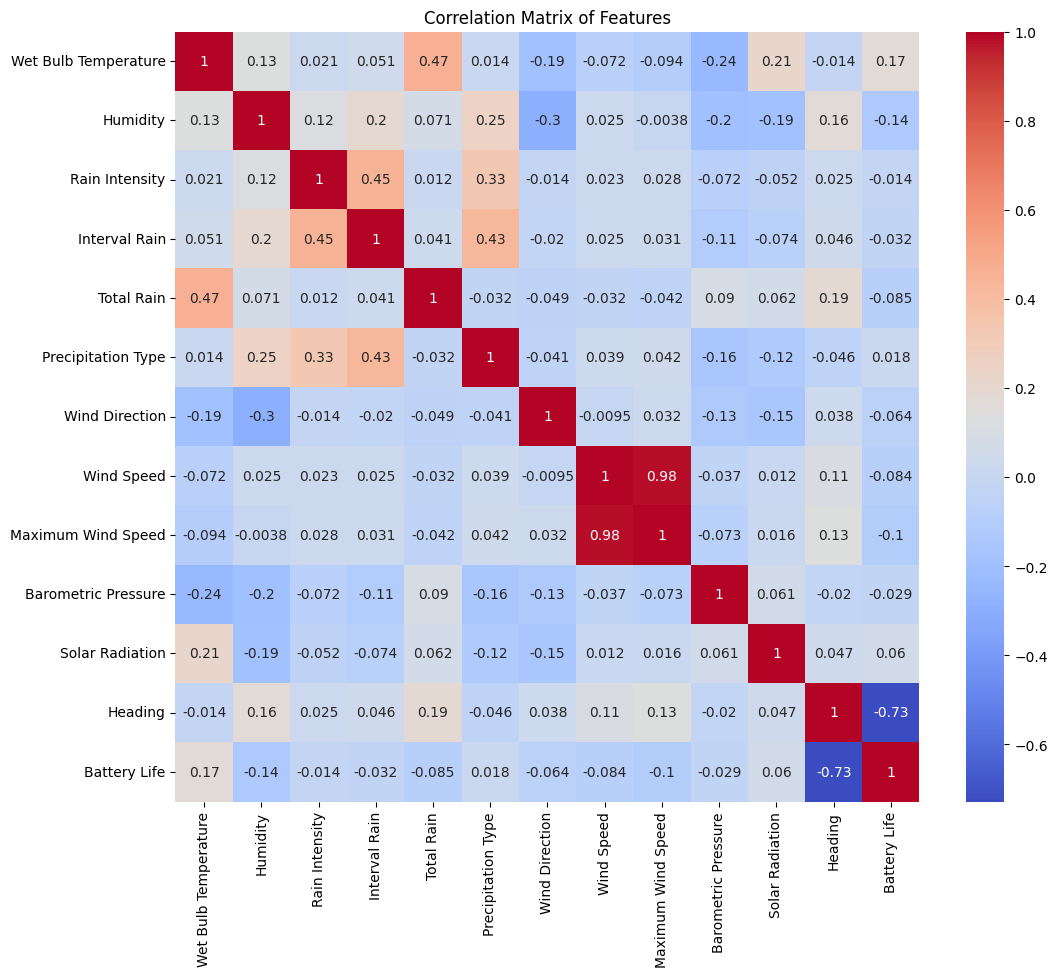

In [13]:
plt.figure(figsize=(12, 10))
correlation = features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (31014, 13)
Testing Data Shape: (7754, 13)


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#XGBoost Model Training
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

In [18]:
#SVM Mode Training
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [19]:
#Ensemble Model - Voting Regressor
stacked_model = VotingRegressor([('svm', svm_model), ('xgb', xgb_model)])
stacked_model.fit(X_train_scaled, y_train)
stacked_pred = stacked_model.predict(X_test_scaled)

In [20]:
def evaluate_model(y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    explained_variance = explained_variance_score(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mse, rmse, mae, mape, explained_variance, r2


In [21]:
svm_mse, svm_rmse, svm_mae, svm_mape, svm_explained_variance, svm_r2 = evaluate_model(y_test, svm_pred)
xgb_mse, xgb_rmse, xgb_mae, xgb_mape, xgb_explained_variance, xgb_r2 = evaluate_model(y_test, xgb_pred)
stacked_mse, stacked_rmse, stacked_mae, stacked_mape, stacked_explained_variance, stacked_r2 = evaluate_model(y_test, stacked_pred)


In [23]:
results = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'Stacked Ensemble'],
    'Mean Squared Error': [svm_mse, xgb_mse, stacked_mse],
    'Root Mean Squared Error': [svm_rmse, xgb_rmse, stacked_rmse],
    'Mean Absolute Error': [svm_mae, xgb_mae, stacked_mae],
    'Mean Absolute Percentage Error (%)': [svm_mape, xgb_mape, stacked_mape],
    'Explained Variance Score': [svm_explained_variance, xgb_explained_variance, stacked_explained_variance],
    'R^2 Score': [svm_r2, xgb_r2, stacked_r2]
})

print("\nSummary of Model Performance:")
print(results)



Summary of Model Performance:
              Model  Mean Squared Error  Root Mean Squared Error  \
0               SVM            0.221303                 0.470429   
1           XGBoost            0.031242                 0.176755   
2  Stacked Ensemble            0.065202                 0.255347   

   Mean Absolute Error  Mean Absolute Percentage Error (%)  \
0             0.168740                                 inf   
1             0.123734                                 inf   
2             0.119344                                 inf   

   Explained Variance Score  R^2 Score  
0                  0.997779   0.997779  
1                  0.999687   0.999686  
2                  0.999346   0.999345  


In [25]:
from sklearn.metrics import mean_absolute_percentage_error


In [26]:
# Splitting a portion of the test set to simulate future/unseen data
X_future, X_evaluation, y_future, y_evaluation = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42)

# Make predictions on the pseudo-future dataset
xgb_future_pred = xgb_model.predict(X_future)
stacked_future_pred = stacked_model.predict(X_future)

# Evaluate performance
def extended_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    variance_score = explained_variance_score(y_true, y_pred)
    return mse, rmse, mae, mape, r2, variance_score

xgb_future_mse, xgb_future_rmse, xgb_future_mae, xgb_future_mape, xgb_future_r2, xgb_future_var = extended_metrics(y_future, xgb_future_pred)
stacked_future_mse, stacked_future_rmse, stacked_future_mae, stacked_future_mape, stacked_future_r2, stacked_future_var = extended_metrics(y_future, stacked_future_pred)

# Summary of results
future_results = pd.DataFrame({
    'Model': ['XGBoost (Future)', 'Stacked Ensemble (Future)'],
    'Mean Squared Error': [xgb_future_mse, stacked_future_mse],
    'Root Mean Squared Error': [xgb_future_rmse, stacked_future_rmse],
    'Mean Absolute Error': [xgb_future_mae, stacked_future_mae],
    'Mean Absolute Percentage Error (%)': [xgb_future_mape, stacked_future_mape],
    'Explained Variance Score': [xgb_future_var, stacked_future_var],
    'R^2 Score': [xgb_future_r2, stacked_future_r2]
})

print("\nFuture Prediction Performance Comparison:")
print(future_results)



Future Prediction Performance Comparison:
                       Model  Mean Squared Error  Root Mean Squared Error  \
0           XGBoost (Future)            0.031677                 0.177979   
1  Stacked Ensemble (Future)            0.066731                 0.258324   

   Mean Absolute Error  Mean Absolute Percentage Error (%)  \
0             0.125006                        7.685851e+11   
1             0.119592                        5.526425e+11   

   Explained Variance Score  R^2 Score  
0                  0.999684   0.999684  
1                  0.999335   0.999335  


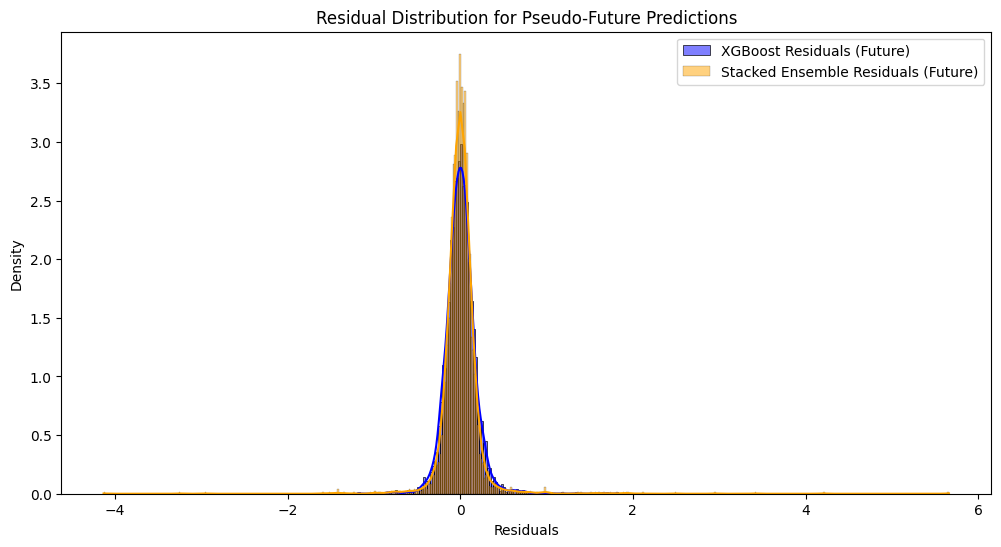

In [27]:
# Calculate residuals for "pseudo-future" predictions
xgb_future_residuals = y_future - xgb_future_pred
stacked_future_residuals = y_future - stacked_future_pred

# Plot residuals distribution to visualize uncertainty
plt.figure(figsize=(12, 6))
sns.histplot(xgb_future_residuals, color='blue', kde=True, label='XGBoost Residuals (Future)', stat="density", common_norm=False)
sns.histplot(stacked_future_residuals, color='orange', kde=True, label='Stacked Ensemble Residuals (Future)', stat="density", common_norm=False)
plt.title("Residual Distribution for Pseudo-Future Predictions")
plt.xlabel("Residuals")
plt.legend()
plt.show()


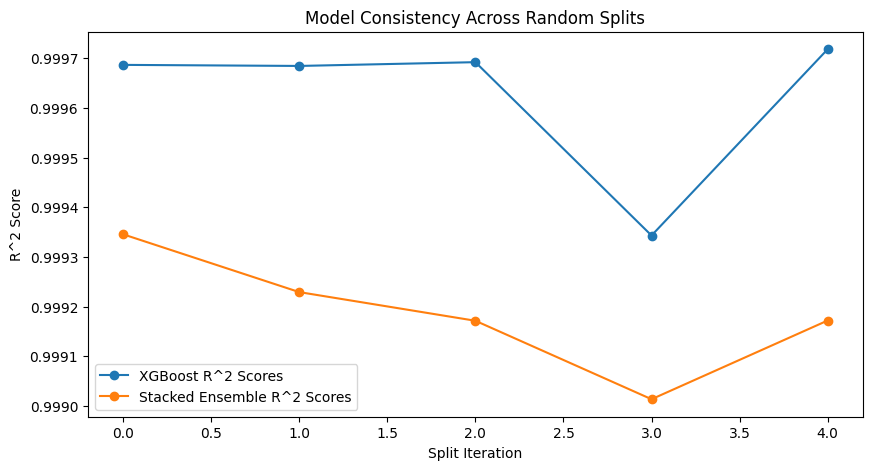

Average R^2 Score for XGBoost: 0.9996246927392797
Average R^2 Score for Stacked Ensemble: 0.9991864064609924


In [28]:
from sklearn.model_selection import ShuffleSplit

# Setting up ShuffleSplit to evaluate consistency
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
xgb_scores, stacked_scores = [], []

for train_index, test_index in shuffle_split.split(features, target):
    X_train_split, X_test_split = features.iloc[train_index], features.iloc[test_index]
    y_train_split, y_test_split = target.iloc[train_index], target.iloc[test_index]

    X_train_split_scaled = scaler.fit_transform(X_train_split)
    X_test_split_scaled = scaler.transform(X_test_split)

    # Train models on split data
    xgb_model.fit(X_train_split_scaled, y_train_split)
    stacked_model.fit(X_train_split_scaled, y_train_split)

    # Predictions on test split
    xgb_pred_split = xgb_model.predict(X_test_split_scaled)
    stacked_pred_split = stacked_model.predict(X_test_split_scaled)

    # R^2 scores
    xgb_scores.append(r2_score(y_test_split, xgb_pred_split))
    stacked_scores.append(r2_score(y_test_split, stacked_pred_split))

# Visualize consistency
plt.figure(figsize=(10, 5))
plt.plot(xgb_scores, label="XGBoost R^2 Scores", marker='o')
plt.plot(stacked_scores, label="Stacked Ensemble R^2 Scores", marker='o')
plt.title("Model Consistency Across Random Splits")
plt.xlabel("Split Iteration")
plt.ylabel("R^2 Score")
plt.legend()
plt.show()

print("Average R^2 Score for XGBoost:", np.mean(xgb_scores))
print("Average R^2 Score for Stacked Ensemble:", np.mean(stacked_scores))


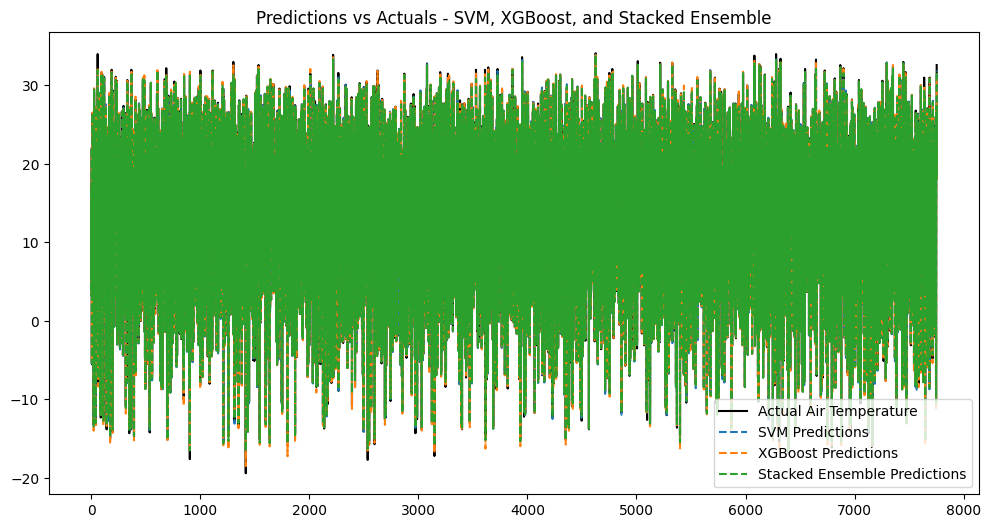

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Air Temperature", color='black')
plt.plot(svm_pred, label="SVM Predictions", linestyle='--')
plt.plot(xgb_pred, label="XGBoost Predictions", linestyle='--')
plt.plot(stacked_pred, label="Stacked Ensemble Predictions", linestyle='--')
plt.legend()
plt.title("Predictions vs Actuals - SVM, XGBoost, and Stacked Ensemble")
plt.show()

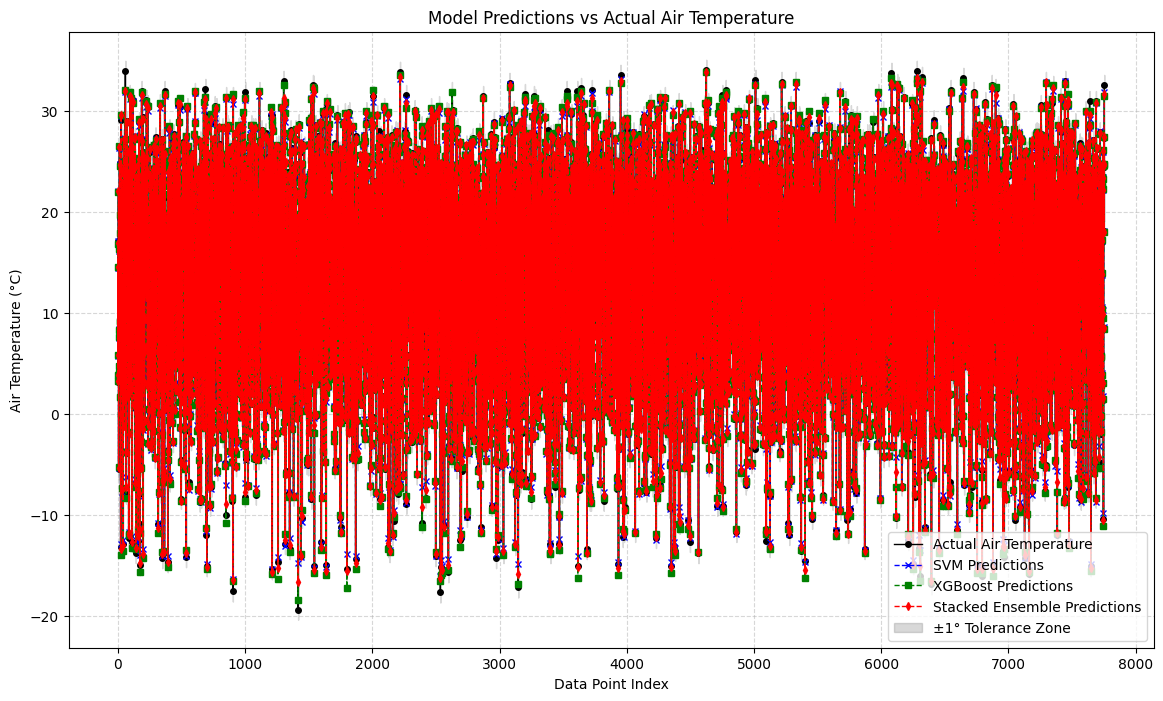

In [30]:
plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label="Actual Air Temperature", color='black', marker='o', markersize=4, linewidth=1)
plt.plot(svm_pred, label="SVM Predictions", color='blue', linestyle='--', marker='x', markersize=4, linewidth=1)
plt.plot(xgb_pred, label="XGBoost Predictions", color='green', linestyle='--', marker='s', markersize=4, linewidth=1)
plt.plot(stacked_pred, label="Stacked Ensemble Predictions", color='red', linestyle='--', marker='d', markersize=4, linewidth=1)

plt.fill_between(range(len(y_test)), y_test.values - 1, y_test.values + 1, color='gray', alpha=0.3, label="±1° Tolerance Zone")
plt.legend()
plt.xlabel("Data Point Index")
plt.ylabel("Air Temperature (°C)")
plt.title("Model Predictions vs Actual Air Temperature")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


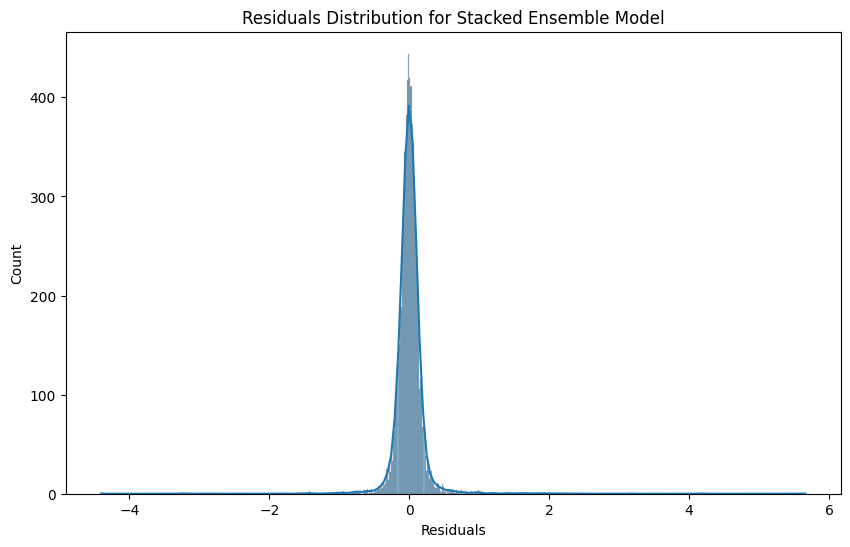

In [31]:
residuals = y_test - stacked_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution for Stacked Ensemble Model")
plt.xlabel("Residuals")
plt.show()

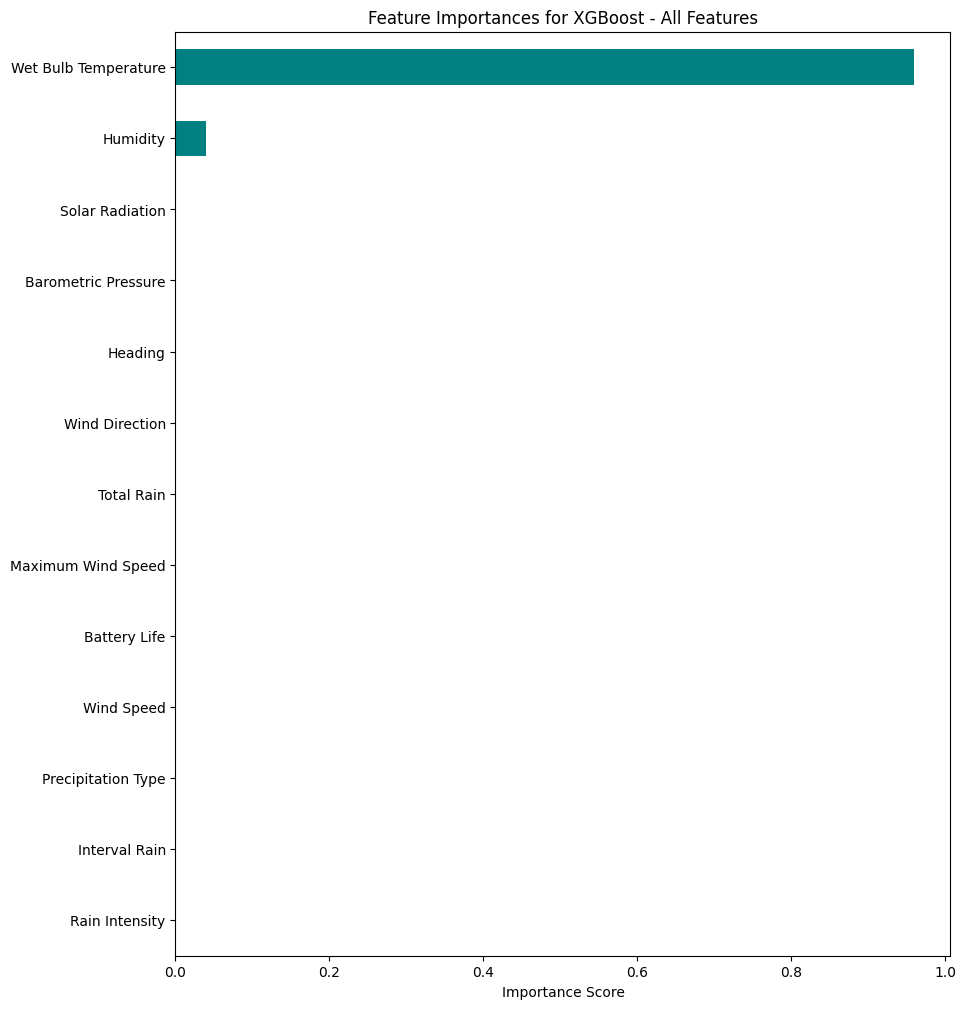

In [33]:
plt.figure(figsize=(10, 12))
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features.columns)
xgb_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importances for XGBoost - All Features")
plt.xlabel("Importance Score")
plt.show()

In [34]:
cv_scores = cross_val_score(stacked_model, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nCross-Validation R^2 Scores:", cv_scores)
print("Mean Cross-Validation R^2 Score:", cv_scores.mean())


Cross-Validation R^2 Scores: [0.99925149 0.99868207 0.99863199 0.9989173  0.9991224 ]
Mean Cross-Validation R^2 Score: 0.9989210508768865


In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
# Hyperparameter tuning for SVM
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVR(), svm_params, cv=3)
svm_grid.fit(X_train_scaled, y_train)
print("Best SVM Params:", svm_grid.best_params_)

Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [38]:
# Hyperparameter tuning for XGBoost
xgb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=3)
xgb_grid.fit(X_train_scaled, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [39]:
svm_best = svm_grid.best_estimator_
xgb_best = xgb_grid.best_estimator_

In [40]:
stacked_model_tuned = VotingRegressor([('svm', svm_best), ('xgb', xgb_best)])
stacked_model_tuned.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('svm', SVR(C=10, gamma='auto')),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [46]:
stacked_tuned_mse, stacked_tuned_rmse, stacked_tuned_mae, stacked_tuned_mape, stacked_tuned_explained_variance, stacked_tuned_r2 = evaluate_model(y_test, stacked_tuned_pred)

print(f"\nStacked Ensemble Tuned - MSE: {stacked_tuned_mse:.6f}, RMSE: {stacked_tuned_rmse:.6f}, MAE: {stacked_tuned_mae:.6f}, MAPE: {stacked_tuned_mape:.2f}%, Explained Variance: {stacked_tuned_explained_variance:.6f}, R^2: {stacked_tuned_r2:.6f}")


Stacked Ensemble Tuned - MSE: 0.022330, RMSE: 0.149433, MAE: 0.074287, MAPE: inf%, Explained Variance: 0.999776, R^2: 0.999776


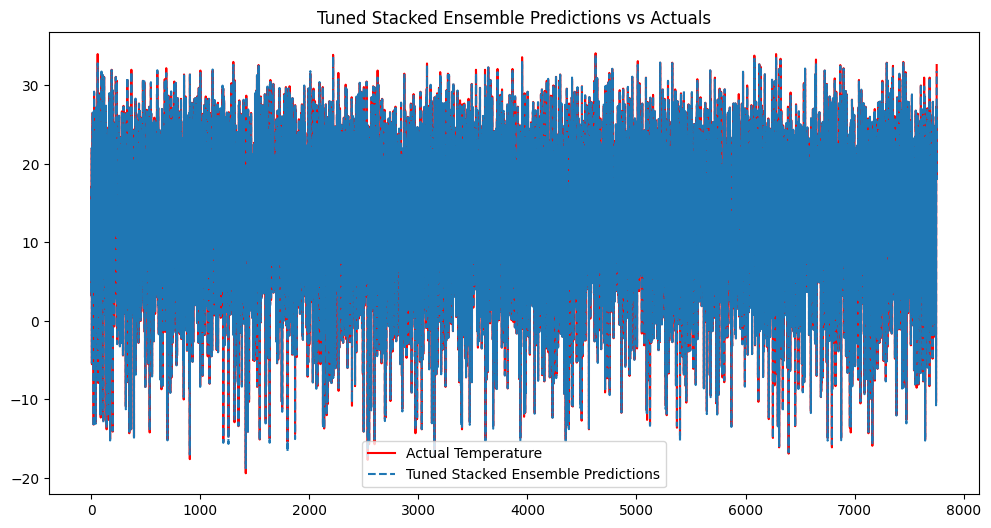

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Temperature", color='red')
plt.plot(stacked_tuned_pred, label="Tuned Stacked Ensemble Predictions", linestyle='--')
plt.legend()
plt.title("Tuned Stacked Ensemble Predictions vs Actuals")
plt.show()

In [45]:
tuned_results = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'Stacked Ensemble'],
    'Mean Squared Error': [svm_mse, xgb_mse, stacked_mse],
    'Root Mean Squared Error': [svm_rmse, xgb_rmse, stacked_rmse],
    'Mean Absolute Error': [svm_mae, xgb_mae, stacked_mae],
    'Mean Absolute Percentage Error (%)': [svm_mape, xgb_mape, stacked_mape],
    'Explained Variance Score': [svm_explained_variance, xgb_explained_variance, stacked_explained_variance],
    'R^2 Score': [svm_r2, xgb_r2, stacked_r2]
})

print("\nFinal Performance Comparison:")
print(tuned_results)


Final Performance Comparison:
              Model  Mean Squared Error  Root Mean Squared Error  \
0               SVM            0.221303                 0.470429   
1           XGBoost            0.031242                 0.176755   
2  Stacked Ensemble            0.065202                 0.255347   

   Mean Absolute Error  Mean Absolute Percentage Error (%)  \
0             0.168740                                 inf   
1             0.123734                                 inf   
2             0.119344                                 inf   

   Explained Variance Score  R^2 Score  
0                  0.997779   0.997779  
1                  0.999687   0.999686  
2                  0.999346   0.999345  


In [48]:
numeric_data = data.select_dtypes(include=[np.number])


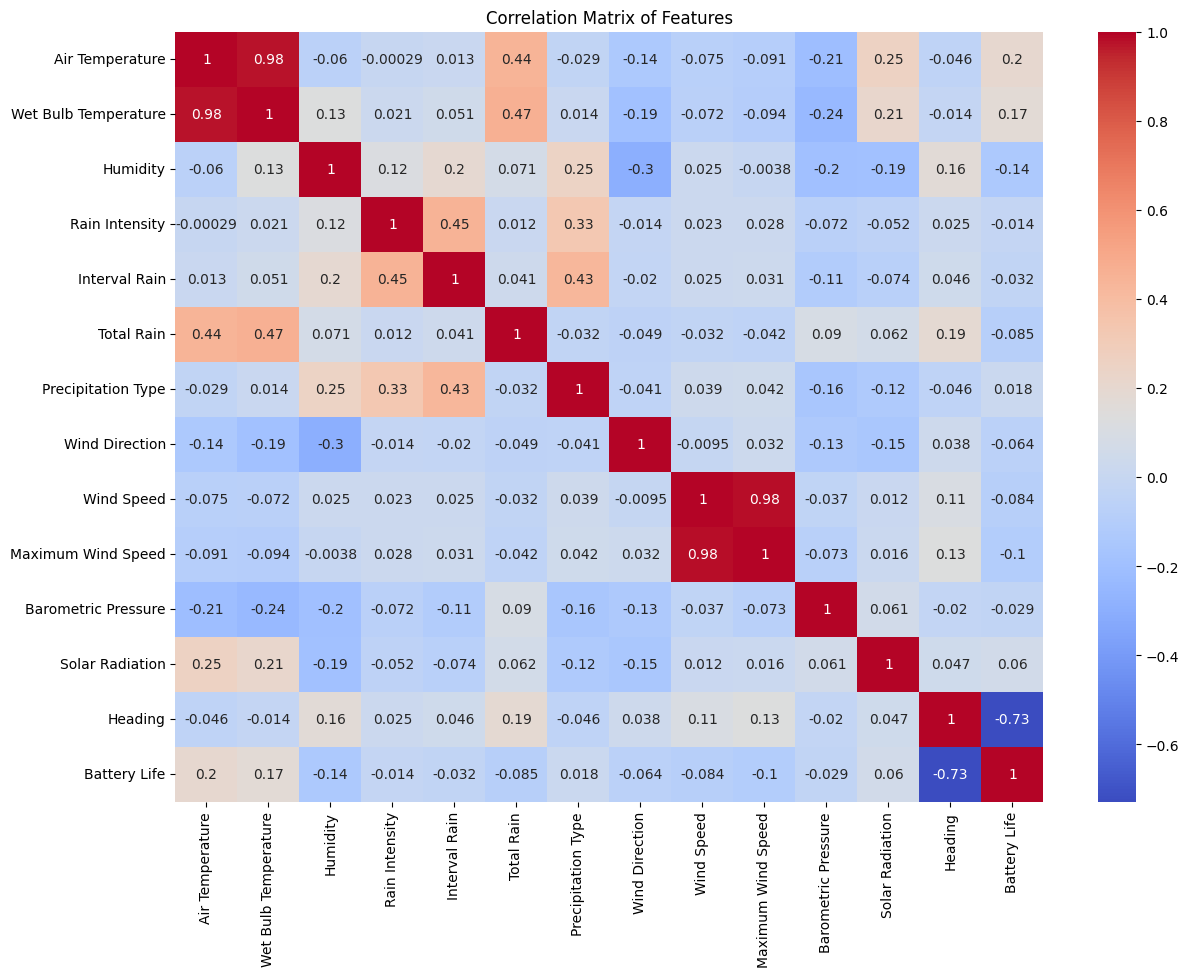

In [49]:
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [50]:
correlation_target = abs(correlation_matrix['Air Temperature'])
selected_features = correlation_target[correlation_target > 0.2].index.tolist()
selected_features.remove('Air Temperature')
print("Selected Features based on correlation:\n", selected_features)

Selected Features based on correlation:
 ['Wet Bulb Temperature', 'Total Rain', 'Barometric Pressure', 'Solar Radiation', 'Battery Life']


In [51]:
X = data[selected_features]
y = data['Air Temperature']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing data split completed.")


Training and testing data split completed.


In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
print("\nTraining SVM Model...")
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)


Training SVM Model...


In [55]:
print("\nTraining Stacked Ensemble Model...")
stacked_model = VotingRegressor([('svm', svm_model), ('xgb', xgb_model)])
stacked_model.fit(X_train_scaled, y_train)
stacked_pred = stacked_model.predict(X_test_scaled)


Training Stacked Ensemble Model...


In [56]:
stacked_mse = mean_squared_error(y_test, stacked_pred)
stacked_r2 = r2_score(y_test, stacked_pred)
print(f"\nStacked Ensemble Model - MSE: {stacked_mse:.5f}, R^2: {stacked_r2:.5f}")


Stacked Ensemble Model - MSE: 2.85418, R^2: 0.97135


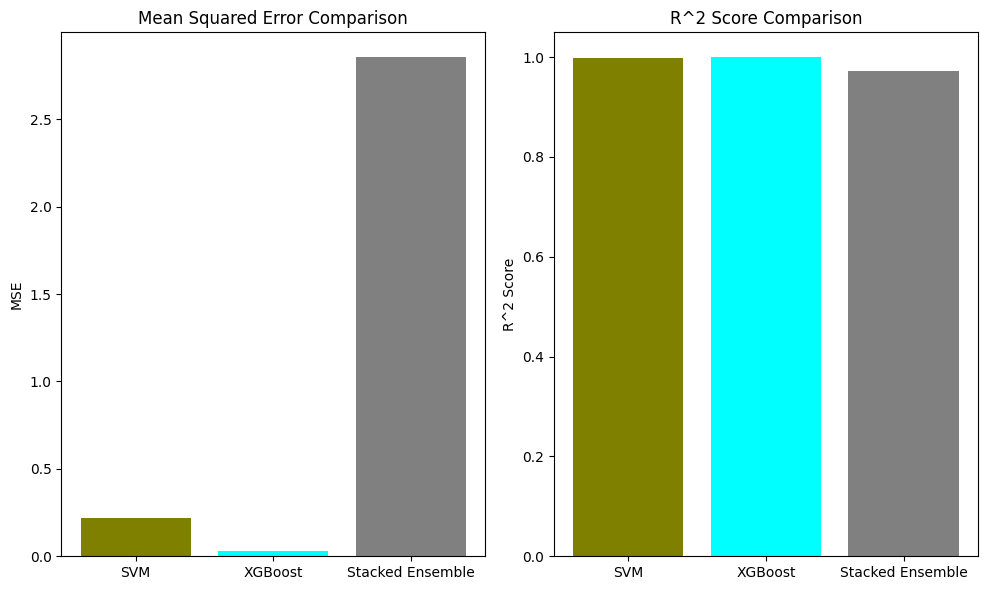

In [57]:
plt.figure(figsize=(10, 6))
model_names = ['SVM', 'XGBoost', 'Stacked Ensemble']
mse_values = [svm_mse, xgb_mse, stacked_mse]
r2_values = [svm_r2, xgb_r2, stacked_r2]

plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color=['olive', 'cyan', 'gray'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color=['olive', 'cyan', 'gray'])
plt.title('R^2 Score Comparison')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

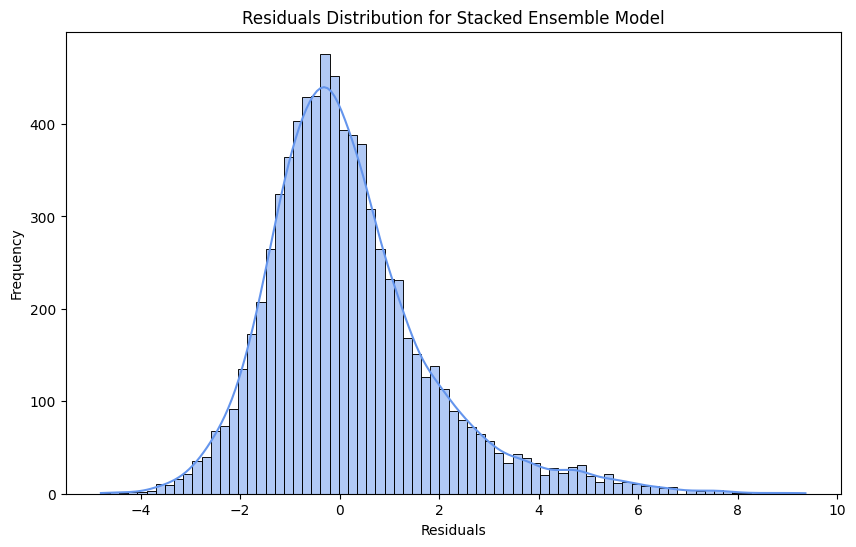

In [58]:
plt.figure(figsize=(10, 6))
residuals = y_test - stacked_pred
sns.histplot(residuals, kde=True, color='cornflowerblue')
plt.title("Residuals Distribution for Stacked Ensemble Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()